<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Lista2_Exerc%C3%ADcio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Aula prática: rede neural básica para classificação com keras*

*Exercício 2*

shape x_train: (80, 100)
shape new_xtrain:  (80, 100)
shape x_test:  (200, 100)
shape new_xtest:  (200, 100)
numero de exemplos de treinamento: 160
numero de exemplos de teste: 400


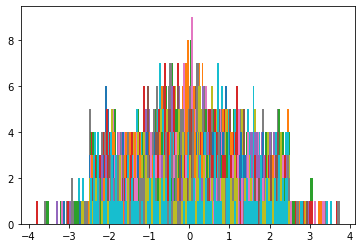

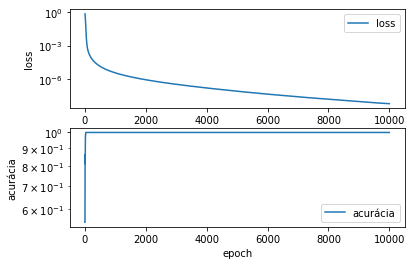

7/7 [==============================] - 0s 3ms/step - loss: 0.1330 - accuracy: 0.9750
Accuracy:97.50
data pred= [[0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.

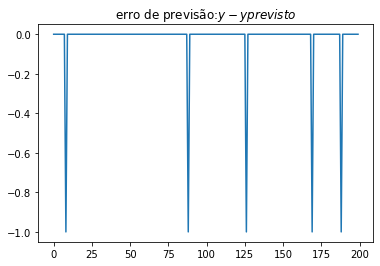

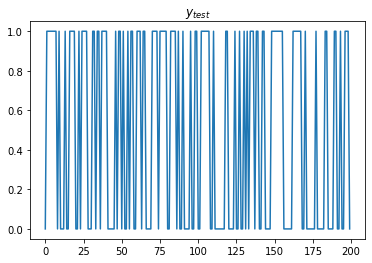

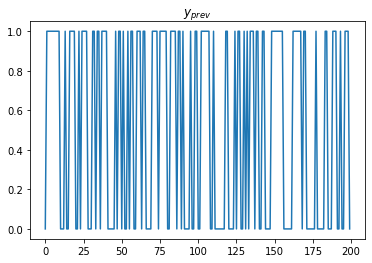

In [ ]:
#exercício 2 
#cria o data set 
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.utils import shuffle
import tensorflow as tf

s_p=100 #quantos pontos os dados de entrada tem
s_d=80 #quantos exemplos tem o Dtrain
s_t=200 #quantos exemplos para teste
#dados de treinamento
#Usamos a função np.random.normal () para o ruido gaussiano e a função

#dados para o teste
#construção dos dados para o treinamento
x_train_N=np.random.normal(0,1,[int(s_d/2),s_p])                                
x_train_U=np.random.uniform(-2.5,2.5,[int(s_d/2),s_p])
x_train=np.concatenate((x_train_N,x_train_U),axis=0)
y_train=np.concatenate((np.zeros([int(s_d/2),1]),np.ones([int(s_d/2),1])),axis=0)
x_train,y_train=shuffle(x_train,y_train)
print('shape x_train:',np.shape(x_train))

#construção do x_train a partir dos dados do histograma 
N_bins=100
new_xtrain=np.zeros([s_d, N_bins])
for nn in range(0,s_d):
  freqs,bins,patches=plt.hist(x_train[nn,:],N_bins)
  new_xtrain[nn,:]=freqs
new_xtest=np.zeros([s_t, N_bins])
new_xtest=np.zeros([s_t,N_bins])
new_xtrain,y_train=shuffle(new_xtrain,y_train)
print('shape new_xtrain: ',np.shape(new_xtrain))

#dados de teste
x_test_N=np.random.normal(0,1,[int(s_t/2),s_p])
x_test_U=np.random.uniform(-2.5,2.5,[int(s_t/2),s_p])
x_test=np.concatenate((x_test_N,x_test_U),axis=0)

#construção do x_train a partir dos dados do histograma 
for nn in range(0,s_t):
   freqs, bins, patches=plt.hist(x_test[nn,:],N_bins)
   new_xtest[nn,:]=freqs
y_test=np.concatenate((np.zeros([int(s_t/2),1]),np.ones([int(s_t/2),1])),axis=0)
new_xtest,y_test=shuffle(new_xtest,y_test)
print('shape x_test: ',np.shape(x_test))
print('shape new_xtest: ',np.shape(new_xtest))

#construção da rede neural
print('numero de exemplos de treinamento:',2*s_d)
print('numero de exemplos de teste:',2*s_t)
model = tf.keras.Sequential(name='Q2_L2')
model.add(tf.keras.layers.Dense(10, input_dim=s_p, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.005);
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

#treina a rede neural com o data set
history=model.fit(new_xtrain,y_train,batch_size=2*s_d, epochs=10000,verbose=0)
#mostra o loss e a acuracia durante o treinamento
plt.figure()
plt.subplot(2,1,1)
plt.semilogy(history.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['loss'])
plt.legend(['loss'], loc='upper right')
plt.subplot(2,1,2)
plt.semilogy(history.history['accuracy'])
plt.ylabel('acurácia');plt.xlabel('epoch')
plt.legend(['acurácia'],loc='lower right')
plt.show()
#permite que faça previsões com a rede treinada
y_pred=model.predict(new_xtest)
#calcula a acurácia do teste
_,accuracy=model.evaluate(new_xtest,y_test)
print('Accuracy:%.2f'%(accuracy*100))
#mostra os resultados esperados e os alcançados lado a lado
print('data pred=',np.concatenate((y_test,np.around(y_pred)),axis=1))
#esboça do gráfico do erro de previsão
plt.figure()
plt.plot(y_test-np.around(y_pred))
plt.title('erro de previsão:$y-y{previsto}$')
plt.show()
plt.figure()
plt.plot(y_test)
plt.title('$y_{test}$')
plt.show()
plt.figure()
plt.plot(np.around(y_pred))
plt.title('$y_{prev}$')
plt.show()

shape x_train: (80, 100)
shape new_xtrain:  (80, 100)
shape x_test:  (200, 100)
shape new_xtest:  (200, 100)
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
numero de exemplos de treinamento: 160
numero de exemplos de teste: 400


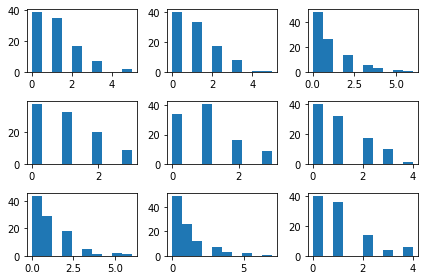

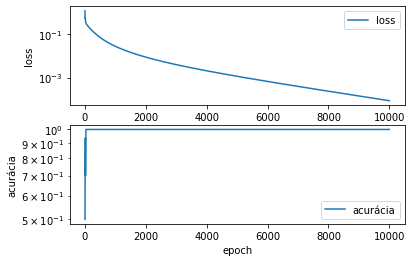

7/7 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.9650
Accuracy:96.50
data pred= [[0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.

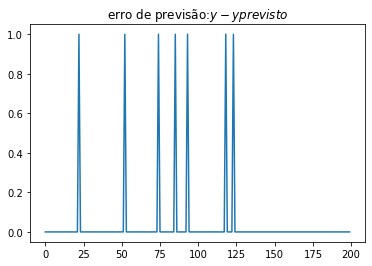

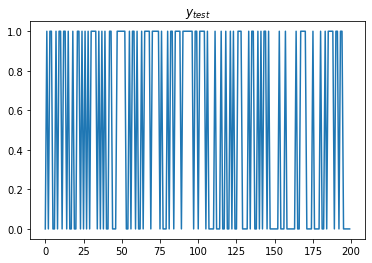

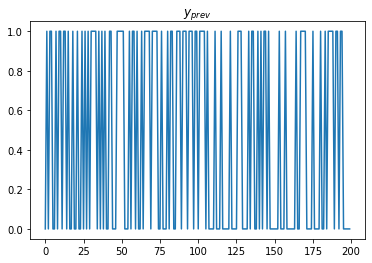

In [4]:
#exercício 2 
#cria o data set 
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.utils import shuffle
import tensorflow as tf

s_p=100 #quantos pontos os dados de entrada tem
s_d=80 #quantos exemplos tem o Dtrain
s_t=200 #quantos exemplos para teste
#dados de treinamento
#Usamos a função np.random.normal () para o ruido gaussiano e a função

#dados para o teste
#construção dos dados para o treinamento
x_train_N=np.random.normal(0,1,[int(s_d/2),s_p])                                
x_train_U=np.random.uniform(-2.5,2.5,[int(s_d/2),s_p])
x_train=np.concatenate((x_train_N,x_train_U),axis=0)
y_train=np.concatenate((np.zeros([int(s_d/2),1]),np.ones([int(s_d/2),1])),axis=0)
x_train,y_train=shuffle(x_train,y_train)
print('shape x_train:',np.shape(x_train))

#construção do x_train a partir dos dados do histograma 
N_bins=100
new_xtrain=np.zeros([s_d, N_bins])
for nn in range(0,s_d):
  freqs,bins,patches=plt.hist(x_train[nn,:],N_bins)
  new_xtrain[nn,:]=freqs
new_xtest=np.zeros([s_t, N_bins])
new_xtest=np.zeros([s_t,N_bins])
new_xtrain,y_train=shuffle(new_xtrain,y_train)
print('shape new_xtrain: ',np.shape(new_xtrain))

#dados de teste
x_test_N=np.random.normal(0,1,[int(s_t/2),s_p])
x_test_U=np.random.uniform(-2.5,2.5,[int(s_t/2),s_p])
x_test=np.concatenate((x_test_N,x_test_U),axis=0)

#construção do x_train a partir dos dados do histograma 
for nn in range(0,s_t):
   freqs, bins, patches=plt.hist(x_test[nn,:],N_bins)
   new_xtest[nn,:]=freqs
y_test=np.concatenate((np.zeros([int(s_t/2),1]),np.ones([int(s_t/2),1])),axis=0)
new_xtest,y_test=shuffle(new_xtest,y_test)
print('shape x_test: ',np.shape(x_test))
print('shape new_xtest: ',np.shape(new_xtest))

for nn in range(0,9):
  plt.subplot(3,3,nn+1)
  plt.hist(new_xtrain[nn,:])
print(y_train[0:9])
plt.tight_layout()

#construção da rede neural
print('numero de exemplos de treinamento:',2*s_d)
print('numero de exemplos de teste:',2*s_t)
model = tf.keras.Sequential(name='Q2_L2')
model.add(tf.keras.layers.Dense(10, input_dim=s_p, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.005);
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

#treina a rede neural com o data set
history=model.fit(new_xtrain,y_train,batch_size=2*s_d, epochs=10000,verbose=0)
#mostra o loss e a acuracia durante o treinamento
plt.figure()
plt.subplot(2,1,1)
plt.semilogy(history.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['loss'])
plt.legend(['loss'], loc='upper right')
plt.subplot(2,1,2)
plt.semilogy(history.history['accuracy'])
plt.ylabel('acurácia');plt.xlabel('epoch')
plt.legend(['acurácia'],loc='lower right')
plt.show()
#permite que faça previsões com a rede treinada
y_pred=model.predict(new_xtest)
#calcula a acurácia do teste
_,accuracy=model.evaluate(new_xtest,y_test)
print('Accuracy:%.2f'%(accuracy*100))
#mostra os resultados esperados e os alcançados lado a lado
print('data pred=',np.concatenate((y_test,np.around(y_pred)),axis=1))
#esboça do gráfico do erro de previsão
plt.figure()
plt.plot(y_test-np.around(y_pred))
plt.title('erro de previsão:$y-y{previsto}$')
plt.show()
plt.figure()
plt.plot(y_test)
plt.title('$y_{test}$')
plt.show()
plt.figure()
plt.plot(np.around(y_pred))
plt.title('$y_{prev}$')
plt.show()